<a href="https://colab.research.google.com/github/tonguip/AI-Project/blob/main/Multi_transferlearning_lstm_no_trainable_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/DGU-AI-LAB/Korean-Tourist-Spot-Dataset.git

Cloning into 'Korean-Tourist-Spot-Dataset'...
remote: Enumerating objects: 10264, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 10264 (delta 1), reused 22 (delta 1), pack-reused 10239
Receiving objects: 100% (10264/10264), 1.66 GiB | 14.20 MiB/s, done.
Resolving deltas: 100% (133/133), done.
Checking out files: 100% (10008/10008), done.


In [ ]:
%load_ext tensorboard
!rm -rf logs/

In [ ]:
import tensorflow as tf
import glob
from datetime import datetime
import os
import numpy as np
import tqdm
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Input, LSTM, Embedding, Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

In [ ]:
def parse_function(img_path):
    image = tf.image.decode_jpeg(tf.io.read_file(img_path))
    image = tf.image.resize(image, (32, 32))
    image = tf.cast(image, tf.float32)

    return image / 255.

In [ ]:
path = '/content/Korean-Tourist-Spot-Dataset/kts/images'
image_list = []
label_list = []
for root, dirs, files in os.walk(path):
    print(os.path.basename(root))
    my_key = os.path.basename(root)

    for file_ in tqdm.tqdm(files):
        full_file_path = os.path.join(root, file_)
        image_list.append(parse_function(full_file_path))
        label_list.append(my_key)

images


0it [00:00, ?it/s]


park


100%|██████████| 1000/1000 [00:22<00:00, 45.35it/s]


lake


100%|██████████| 1000/1000 [00:15<00:00, 63.28it/s]


island


100%|██████████| 1000/1000 [00:11<00:00, 86.18it/s]


beach


100%|██████████| 1000/1000 [00:16<00:00, 61.19it/s]


restaurant


100%|██████████| 1000/1000 [00:16<00:00, 62.25it/s]


tower


100%|██████████| 1000/1000 [00:17<00:00, 55.73it/s]


palace


100%|██████████| 1000/1000 [00:17<00:00, 58.40it/s]


mountain


100%|██████████| 1000/1000 [00:14<00:00, 67.84it/s]


cave


100%|██████████| 1000/1000 [00:19<00:00, 51.08it/s]


amusement park


100%|██████████| 1000/1000 [00:16<00:00, 59.33it/s]


In [ ]:
def unique_n(e=10):
    num = []
    for num_i in range(e):
        num.append(num_i)
    pairs = []

    for x1 in num:
        for x2 in num:
            if [x1,x2] and [x2,x1] not in pairs:
                pairs.append([x1,x2])

    return pairs

In [ ]:
list_num_pairs = unique_n()
len(list_num_pairs)

55

In [ ]:
def find_i(pairs,y):
    try:
        return pairs.index([y[0],y[1]])
    except:
        return pairs.index([y[1],y[0]])

In [ ]:
def sampling_data(x, y,sampling_size=50000,sequence_size = 2,output_size = 3):
    x_T, y_T = [], []
    process = True
    while process:
        x_batch, y_batch = [], []
        for i in range(sequence_size):
            step = np.random.randint(0, len(x))
            x_step = x[step]
            x_batch.append(x_step)
            y_step = y[step]
            y_batch.append(y_step)

        x_T.append(x_batch)
        y_T.append(find_i(list_num_pairs,y_batch))

        sampling_size -= 1
        if sampling_size == 0 : process = False
    y_T = tf.keras.utils.to_categorical(y_T)
    return np.array(x_T), y_T

In [ ]:
unique_label = np.unique(np.array(label_list))

In [ ]:
unique_label

array(['amusement park', 'beach', 'cave', 'island', 'lake', 'mountain',
       'palace', 'park', 'restaurant', 'tower'], dtype='<U14')

In [ ]:
for i,iten in enumerate(label_list):
  label_list[i] = np.where(unique_label==iten)[0].tolist()[0]

In [ ]:
base_y_T = tf.keras.utils.to_categorical(label_list)

In [ ]:
x_T, y_T = sampling_data(image_list,label_list)

In [ ]:
x_T.shape,':', y_T.shape

((50000, 2, 32, 32, 3), ':', (50000, 55))

In [ ]:
list_ck55 = {}
for itne in np.argmax(y_T, 1):
  if itne not in list_ck55:
      list_ck55[itne] = 1
  else:
      list_ck55[itne] += 1

([<matplotlib.axis.XTick at 0x7f17f5cd7f50>,
 [Text(0, 0, '42'),
  Text(0, 0, '14'),
  Text(0, 0, '18'),
  Text(0, 0, '26'),
  Text(0, 0, '20'),
  Text(0, 0, '28'),
  Text(0, 0, '22'),
  Text(0, 0, '12'),
  Text(0, 0, '51'),
  Text(0, 0, '39'),
  Text(0, 0, '25'),
  Text(0, 0, '35'),
  Text(0, 0, '24'),
  Text(0, 0, '8'),
  Text(0, 0, '7'),
  Text(0, 0, '33'),
  Text(0, 0, '38'),
  Text(0, 0, '44'),
  Text(0, 0, '15'),
  Text(0, 0, '29'),
  Text(0, 0, '32'),
  Text(0, 0, '19'),
  Text(0, 0, '53'),
  Text(0, 0, '4'),
  Text(0, 0, '30'),
  Text(0, 0, '47'),
  Text(0, 0, '11'),
  Text(0, 0, '13'),
  Text(0, 0, '9'),
  Text(0, 0, '6'),
  Text(0, 0, '37'),
  Text(0, 0, '27'),
  Text(0, 0, '34'),
  Text(0, 0, '5'),
  Text(0, 0, '36'),
  Text(0, 0, '21'),
  Text(0, 0, '54'),
  Text(0, 0, '46'),
  Text(0, 0, '48'),
  Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '31'),
  Text(0, 0, '17'),
  Text(0, 0, '45'),
  Text(0, 0, '23'),
  Text(0, 0, '40'),
  Text(0, 0, '49'),
  Te

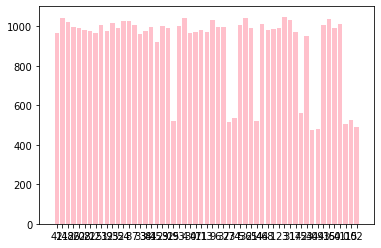

In [ ]:
plt.bar(range(len(list_ck55)), list(list_ck55.values()), color = 'pink')
plt.xticks(range(len(list_ck55)), list(list_ck55.keys()))

In [ ]:
vision_model = Sequential()
vision_model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
vision_model.add(BatchNormalization())
vision_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
vision_model.add(BatchNormalization())
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Dropout(0.2))
vision_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
vision_model.add(BatchNormalization())
vision_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
vision_model.add(BatchNormalization())
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Dropout(0.3))
vision_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
vision_model.add(BatchNormalization())
vision_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
vision_model.add(BatchNormalization())
vision_model.add(MaxPooling2D((2, 2)))
vision_model.add(Dropout(0.4))

vision_model.add(Flatten())
vision_model.add(Dense(128, activation='relu'))
vision_model.add(Dense(64, activation='relu'))
vision_model.add(Dense(32, activation='relu'))
vision_model.add(Dense(16, activation='relu'))
vision_model.add(Dense(10, activation='softmax'))

In [ ]:
vision_model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
vision_model.fit(np.array(image_list),base_y_T,  epochs = 20, batch_size = 64 ,validation_split=0.1)

Epoch 1/20
141/141 [==============================] - 15s 29ms/step - loss: 1.5837 - accuracy: 0.4320 - val_loss: 17.2276 - val_accuracy: 0.0000e+00
Epoch 2/20
141/141 [==============================] - 3s 23ms/step - loss: 1.0948 - accuracy: 0.6214 - val_loss: 16.1885 - val_accuracy: 0.0000e+00
Epoch 3/20
141/141 [==============================] - 3s 23ms/step - loss: 0.9034 - accuracy: 0.6904 - val_loss: 16.9144 - val_accuracy: 0.0000e+00
Epoch 4/20
141/141 [==============================] - 3s 23ms/step - loss: 0.8123 - accuracy: 0.7272 - val_loss: 16.4586 - val_accuracy: 0.0000e+00
Epoch 5/20
141/141 [==============================] - 3s 23ms/step - loss: 0.7175 - accuracy: 0.7519 - val_loss: 18.4156 - val_accuracy: 0.0000e+00
Epoch 6/20
 13/141 [=>............................] - ETA: 2s - loss: 0.7218 - accuracy: 0.7584

In [ ]:
vision_model.summary()

In [ ]:
base_vision_model = Model(inputs=vision_model.input,
outputs=vision_model.get_layer('flatten').output)

In [ ]:
# for l in base_vision_model.layers[0:]:
#     l.trainable = False

In [ ]:
base_vision_model.summary()

In [ ]:
from keras.layers import TimeDistributed,CuDNNLSTM,Concatenate,Reshape

video_input = Input(shape=(2, 32, 32, 3))

encoded_frame_sequence = TimeDistributed(base_vision_model)(video_input)

merged = Concatenate()([encoded_frame_sequence,encoded_frame_sequence,encoded_frame_sequence])

encoded_video = LSTM(256)(merged)

output = Dense(55, activation='softmax')(encoded_video)
video_qa_model = Model(inputs=video_input, outputs=output)

In [ ]:
video_qa_model.summary()

In [ ]:
import tensorflow as tf
adm = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

video_qa_model.compile(optimizer=adm,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = video_qa_model.fit( x_T,y_T, epochs = 20, batch_size = 64,validation_split=0.2,callbacks=[tensorboard_callback])

Epoch 1/20
625/625 [==============================] - 40s 58ms/step - loss: 1.2615 - accuracy: 0.6630 - val_loss: 0.5981 - val_accuracy: 0.8283
Epoch 2/20
625/625 [==============================] - 35s 57ms/step - loss: 0.6000 - accuracy: 0.8217 - val_loss: 0.6474 - val_accuracy: 0.8055
Epoch 3/20
625/625 [==============================] - 36s 58ms/step - loss: 0.4472 - accuracy: 0.8653 - val_loss: 0.4312 - val_accuracy: 0.8677
Epoch 4/20
625/625 [==============================] - 36s 58ms/step - loss: 0.3511 - accuracy: 0.8918 - val_loss: 0.2729 - val_accuracy: 0.9194
Epoch 5/20
625/625 [==============================] - 35s 57ms/step - loss: 0.3045 - accuracy: 0.9057 - val_loss: 0.1753 - val_accuracy: 0.9468
Epoch 6/20
625/625 [==============================] - 36s 57ms/step - loss: 0.2740 - accuracy: 0.9143 - val_loss: 0.2271 - val_accuracy: 0.9312
Epoch 7/20
625/625 [==============================] - 36s 58ms/step - loss: 0.2346 - accuracy: 0.9271 - val_loss: 0.1615 - val_accuracy:

In [ ]:
%tensorboard --logdir logs

In [ ]:
x_Test, y_Test_onehot= sampling_data(image_list,label_list,sampling_size=20000)

score = video_qa_model.evaluate(x_Test, y_Test_onehot)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

preds = video_qa_model.predict(x_Test)

y_Test = np.argmax(y_Test_onehot, 1)
y2_pred = np.argmax(preds, 1)

print ('Correct number:           ', y_Test)
print ('Result(Predicted number): ', y2_pred)

625/625 [==============================] - 10s 14ms/step - loss: 0.0615 - accuracy: 0.9815
Test loss: 0.06153319776058197
Test accuracy: 0.9815000295639038
Correct number:            [ 0 24 13 ... 20 43 24]
Result(Predicted number):  [ 0 24 13 ... 20 43 24]


In [ ]:
list_ck55 = {}
for itne in np.argmax(y_Test_onehot, 1):
  if itne not in list_ck55:
      list_ck55[itne] = 1
  else:
      list_ck55[itne] += 1
# plt.bar(range(len(list_ck55)), list(list_ck55.values()), color = 'pink')
# plt.xticks(range(len(list_ck55)), list(list_ck55.keys()))

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
labels = list_num_pairs
y_test = np.argmax(y_Test_onehot, axis=1)
y_evaluate = np.argmax(preds, axis=1)
report = classification_report(y_test, y_evaluate, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       195
           1       0.99      0.99      0.99       418
           2       0.99      0.99      0.99       407
           3       0.98      0.99      0.98       402
           4       0.98      0.99      0.99       377
           5       0.97      0.99      0.98       433
           6       1.00      0.99      0.99       394
           7       0.98      0.96      0.97       405
           8       0.97      1.00      0.99       423
           9       0.98      0.98      0.98       399
          10       0.97      0.98      0.97       186
          11       0.99      0.99      0.99       424
          12       0.97      0.98      0.97       417
          13       0.99      0.98      0.98       388
          14       0.97      0.99      0.98       404
          15       0.97      0.98      0.98       364
          16       0.99      0.97      0.98       378
          17       0.99    

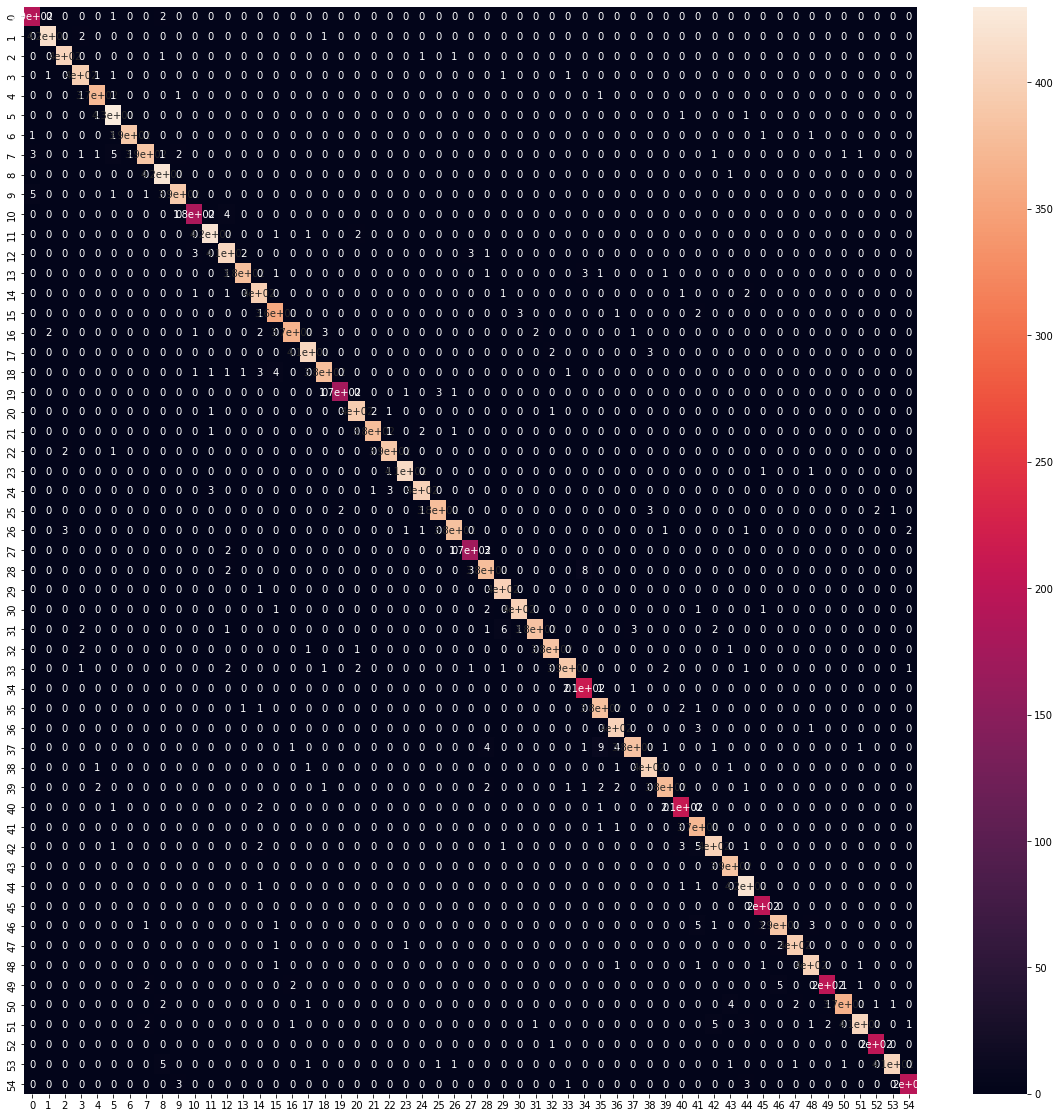

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_evaluate)
plt.figure(figsize = (20,20))
sn.heatmap(cf_matrix, annot=True)

In [ ]:
video_qa_model.save('V_pai_Korean_Tourist.h5')

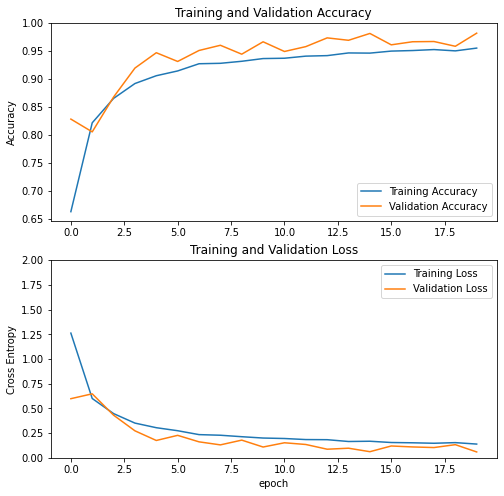

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()